<a href="https://colab.research.google.com/github/ikrishna04/Unsupervised_Learning_Fish_dataset/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Data Loading

In [2]:
df_fish  = pd.read_csv('/content/fish.csv',header=None)
df_fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


#Preprocessing

In [3]:
#Check the info
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [4]:
#Identify the duplicate values
df_fish.duplicated().sum()

np.int64(0)

In [5]:
df_fish.describe()

,1,2,3,4,5,6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [6]:
df_fish.shape

(85, 7)

In [7]:
#Drop the column 0
df_fish=df_fish.drop(0,axis=1)
df_fish.head()

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [8]:
#check AVG of null values
df_fish.isnull().mean()*100

,0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


#Model Building

In [9]:
#since all columns are taken
X=df_fish.values

K-means

In [10]:
WCSS = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

#Elbow method

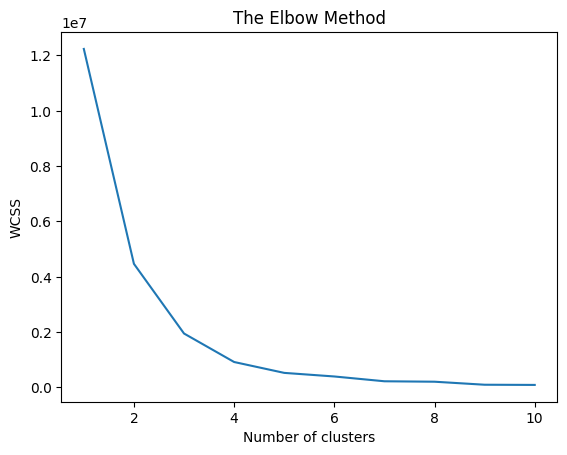

In [11]:
plt.plot(range(1,11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#from the elbow plot, we can fix value of k as 3
# building the kmeans clustering model
kmeans = KMeans(n_clusters=3, init='k-means++') # model building
# max_iter can be set if we need to fix the number of iteration
y_kmeans = kmeans.fit_predict(X) # output generation

In [13]:
df_fish['Cluster'] = y_kmeans
df_fish.head()

,1,2,3,4,5,6,Cluster
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,0


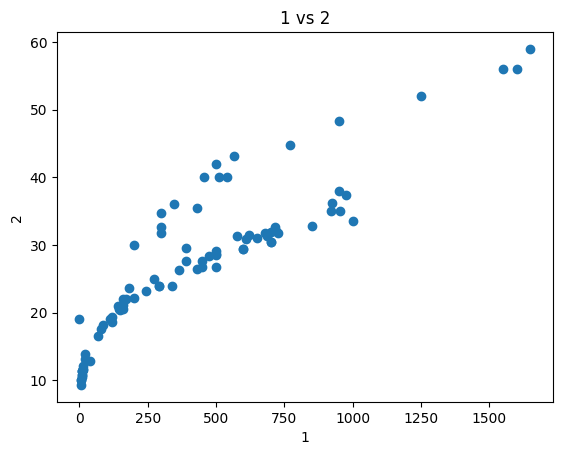

In [14]:
# after clustering
plt.scatter(df_fish[1], df_fish[2],)
plt.title('1 vs 2')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

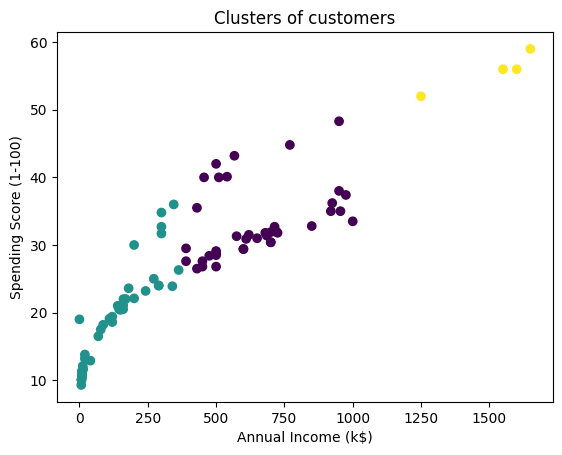

In [15]:
# Before clustering
plt.scatter(df_fish[1], df_fish[2],
            c = df_fish['Cluster'])
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Plotting the clusters on each columns by taking 2 at a time

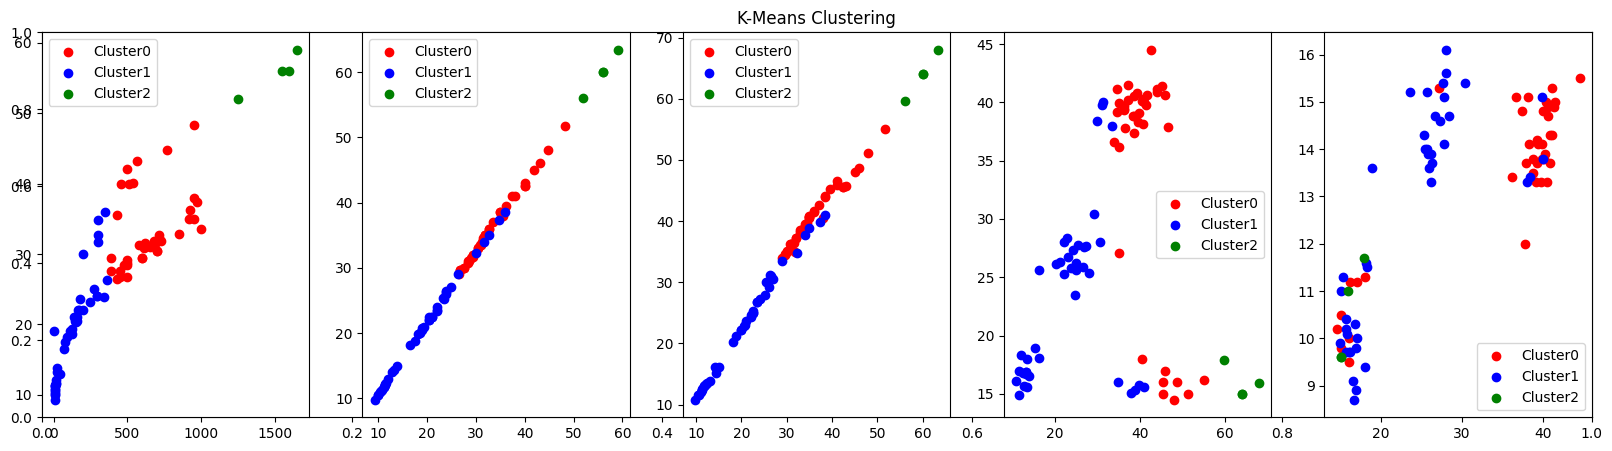

In [16]:
plt.figure(figsize=(20,5))
plt.title('K-Means Clustering')
colors = ['red', 'blue', 'green']

#ploting 1 vs 2
plt.subplot(1,5,1)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][1],
              df_fish[df_fish['Cluster'] == i][2],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 2 vs 3
plt.subplot(1,5,2)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][2],
              df_fish[df_fish['Cluster'] == i][3],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 3 vs 4
plt.subplot(1,5,3)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][3],
              df_fish[df_fish['Cluster'] == i][4],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 4 vs 5
plt.subplot(1,5,4)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][4],
              df_fish[df_fish['Cluster'] == i][5],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 5 vs 6
plt.subplot(1,5,5)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][5],
              df_fish[df_fish['Cluster'] == i][6],
              c = colors[i], label = f'Cluster{i}')
plt.legend()
plt.show()

In [17]:
# predict the cluster
def predict_cluster(val1, val2, val3, val4, val5, val6):
  new_data = [[val1, val2, val3, val4, val5, val6]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [18]:
# Example of using the corrected predict_cluster function
predicted_cluster = predict_cluster(242.0, 23.2, 25.4, 30.0, 38.4, 13.4)
print('The values belong to the cluster', predicted_cluster)

The values belong to the cluster 1


#Agglomerative clustering

In [19]:
ag_cluster = linkage(X, method='ward')  # ward, single, centroid
# linkage matrix i.e; agglomerative cluster model

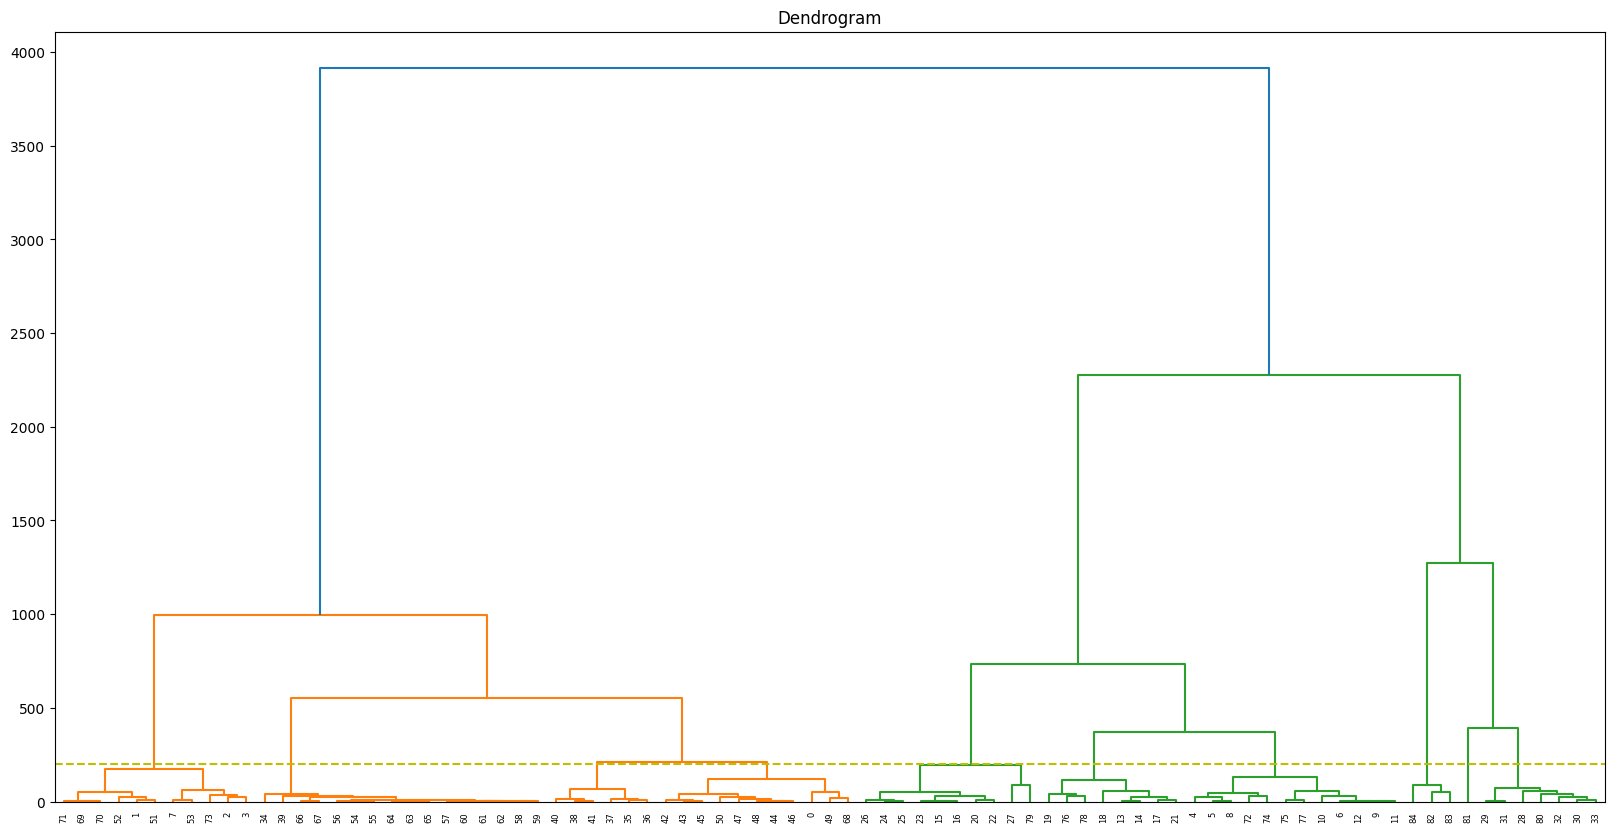

In [20]:
plt.figure(figsize=(20,10))
dendrogram(ag_cluster)
plt.axhline(y=200, color='y', linestyle='--')
plt.title('Dendrogram')
plt.show()

In [21]:
cluster_labels = fcluster(ag_cluster, t=200, criterion='distance')
df_fish['Cluster_Agglomerative'] = cluster_labels
df_fish.head()

,1,2,3,4,5,6,Cluster,Cluster_Agglomerative
0,242.0,23.2,25.4,30.0,38.4,13.4,1,4
1,290.0,24.0,26.3,31.2,40.0,13.8,1,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1,1
4,430.0,26.5,29.0,34.0,36.6,15.1,0,7


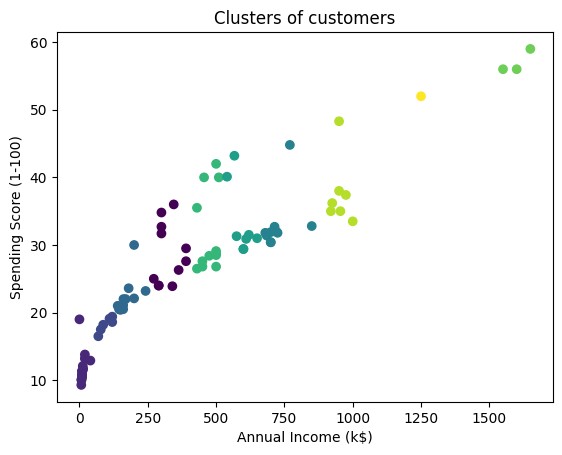

In [22]:
# after clustering
plt.scatter(df_fish[1], df_fish[2],
            c = df_fish['Cluster_Agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

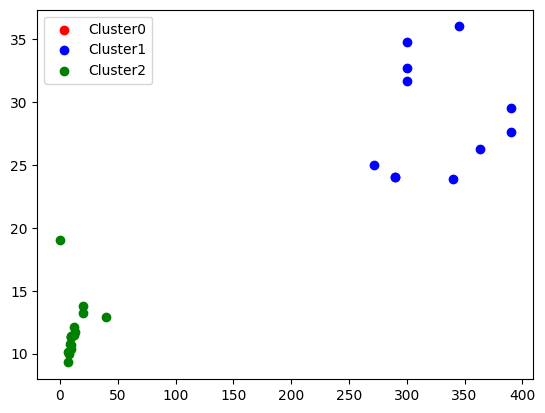

In [23]:
colors = ['red', 'blue', 'green']
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative'] == i]
  plt.scatter(df_fish[df_fish['Cluster_Agglomerative'] == i][1],
              df_fish[df_fish['Cluster_Agglomerative'] == i][2],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

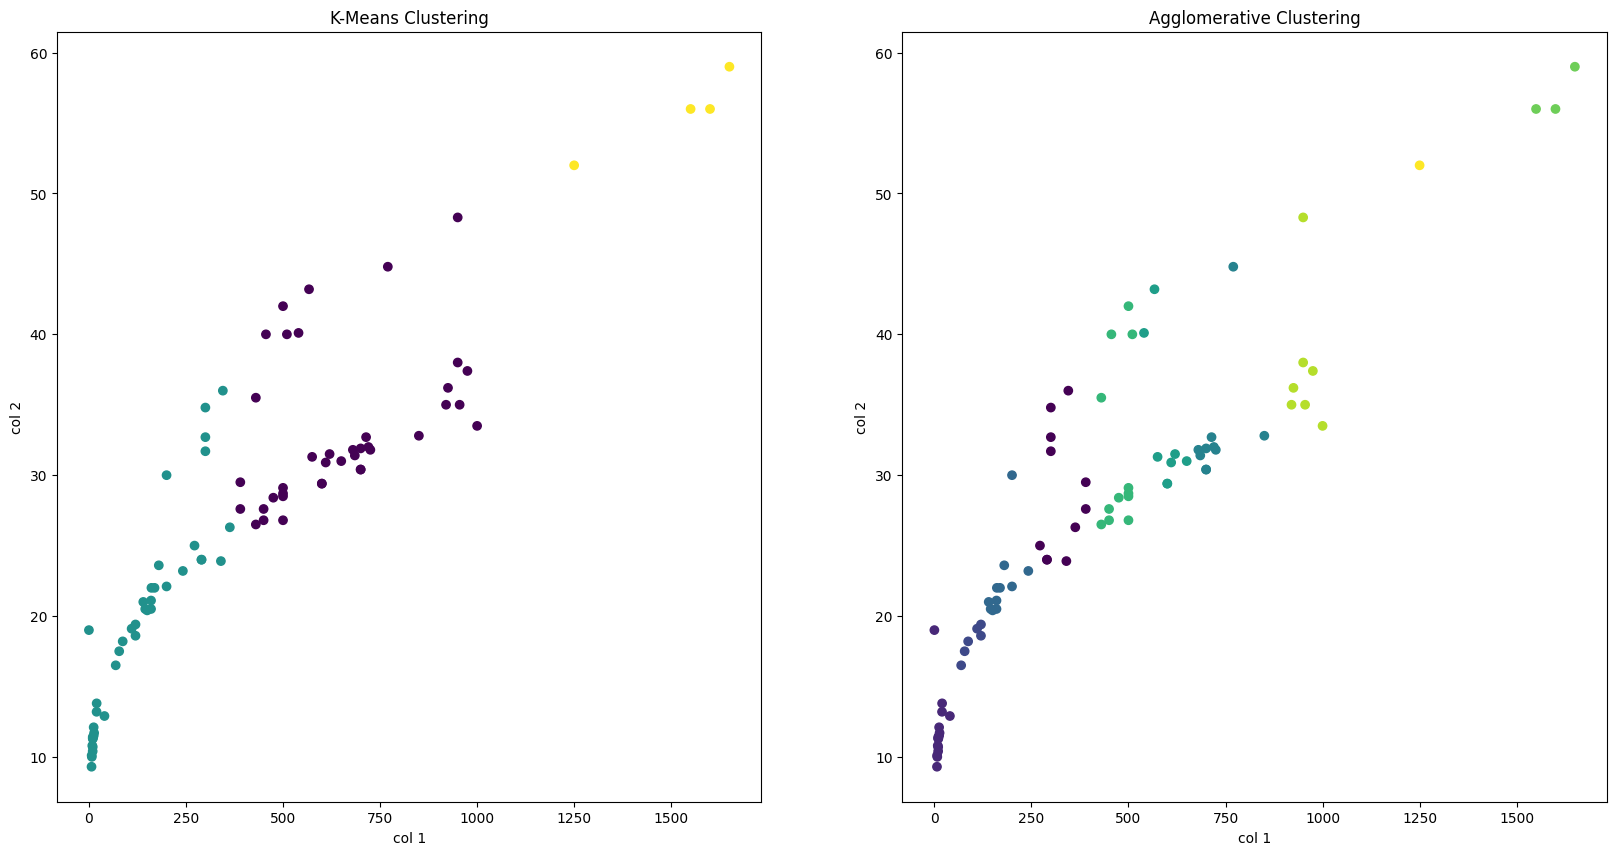

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(df_fish[1],
            df_fish[2],
            c = df_fish['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('col 1')
plt.ylabel('col 2')

plt.subplot(1,2,2)
plt.scatter(df_fish[1],
            df_fish[2],
            c = df_fish['Cluster_Agglomerative'])
plt.title('Agglomerative Clustering')
plt.xlabel('col 1')
plt.ylabel('col 2')

plt.show()